In [ ]:
import numpy as np
from sympy import andre

np.set_printoptions(suppress=True, precision=6)  # display-style only

# Determinant and Trace

Determinant and Trace

In [ ]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,10]])

determinant = np.linalg.det(A)
trace = np.linalg.trace(A)
print(determinant, trace)

Determinant of an Upper Triangular Matrix

In [ ]:
A = np.array([[1,2,3],
              [0,5,6],
              [0,0,9]])
determinant = np.prod(np.diag(A))
print(determinant)

determinant = np.linalg.det(A)
print(determinant)

Determinant Implementation using Laplace Expansion

In [ ]:
def det(A, j:int=0): # Expanding along row j
    if A.shape[0] == A.shape[1] == 1:
        return A[0,0]
    deter = 0
    for k in range(A.shape[1]):
        Aj = np.delete(A,j,axis=0)
        Ajk = np.delete(Aj,k,axis=1)
        deter += (-1) ** (k+j) * A[j,k] * det(Ajk, 0)
    return deter

A = np.array([[1,2,3],
              [4,5,6],
              [7,8,10]])
print(det(A))

Inverse

In [ ]:
def inv(A):
    return np.linalg.inv(A)

Properties

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
B = np.array([[1,2,3],[4,5,6],[7,8,11]])
C = np.array([[1,2,3],[5,7,9],[7,8,10]]) # A with new row 2 = old row 1 + old row 2
D = np.array([[4,5,6],[1,2,3],[7,8,10]]) # A with new row 2 = old row 1 + old row 2

prod = det(A) * det(B) == det(A @ B)
trans = det(A) == det(A.T)
inve = np.allclose(det(inv(A)), 1 / det(A))
row_change = det(A) == det(C)
scale = det(2 * A) == (2 ** A.shape[0]) * det(A)
sign = det(A) == -det(D)
print(prod,trans, inve, row_change, scale, sign)

Rank

In [ ]:
def rank(A):
    return np.linalg.matrix_rank(A)

In [ ]:
A = np.array([[1,7,11],[4,5,6],[7,8,10]])
rank_ = rank(A) == A.shape[0]
deter = det(A) != 0
print(rank_, deter)

Trace Properties

In [ ]:
def trace(A):
    return np.linalg.trace(A)

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
B = np.array([[1,2,3],[4,5,6],[7,8,11]])
C = np.array([[1,2],[4,5],[7,8]])
D = np.array([[3,4,5],[6,8,10]])
I3 = np.eye(3)

add = trace(A+B) == trace(A) + trace(B)
scale = trace(3*A) == 3 * trace(A)
identity = trace(I3) == I3.shape[0]
comm = trace(D@C) == trace(C@D)
print(add, scale, identity, comm)

Characteristic Polynomial

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])

coeff = np.poly(A) # λ^3 - 16λ^2 - 12λ + 3 = 0 # c0 = 3 or -3 (if we move the equation to RHS), c2 = 16 or -16 (if we move the equation to RHS)
c0 = det(A)
c2 = trace(A)
print(coeff, c2, c0)

# Eigenvalues and Eigenvectors

![image.png](Images/img_2.png)
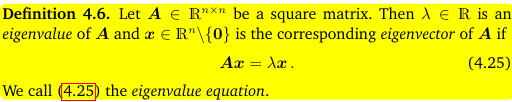

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])

eig_val = np.linalg.eigvals(A)
print(eig_val)

![image.png](Images/img_3.png)
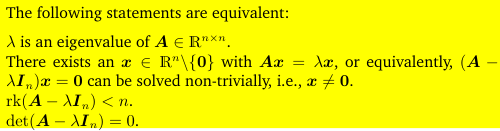

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
I = np.eye(3)
eig_val = np.linalg.eigvals(A)
λ = eig_val[0]
rank_ = rank(A-λ*I) # rank(A - λI) < 3
deter = det(A - λ * I) # det(A - λI) = 0
deter = np.allclose(deter, 0)

print(eig_val, rank_, deter, sep='\n')

![image.png](Images/img_4.png)
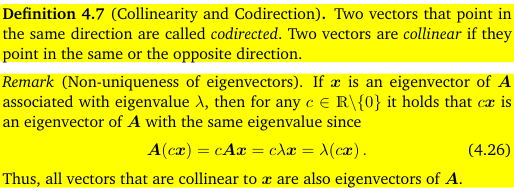
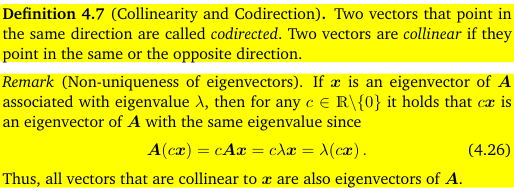

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
I = np.eye(3)
eig_val, eig_vec = np.linalg.eig(A)
x = eig_vec[:,0]
λ = eig_val[0]

lhs1 = A @ (3*x) # scaled eigen vector is also an eigen vector with same eigen value
rhs1 = 3 * (A @ x)
rhs2 = 3 * (λ * x)
rhs3 = λ * (3*x)

ok = (
    np.allclose(lhs1, rhs1) and
    np.allclose(rhs1, rhs2) and
    np.allclose(rhs2, rhs3)
)

print(ok)   # True

![image.png](Images/img_5.png)
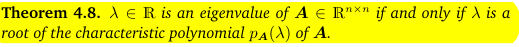

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])
coeff = np.poly(A) # λ^3 - 16λ^2 - 12λ + 3 = 0
eig_val = np.linalg.eigvals(A)
λ = eig_val[0]

sum = 0
for i in range(len(coeff)):
    sum+= coeff[len(coeff)-1-i] * (λ ** i)

sum = np.allclose(sum,0)
print(sum)

![image.png](Images/img_6.png)
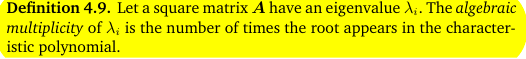

In [ ]:
A = np.array([[4,0,0],[2,1,3],[5,0,4]])
eig_val = np.linalg.eigvals(A)

vals, counts = np.unique(np.round(eig_val, 10), return_counts=True)

for v, c in zip(vals, counts):
    print(f"{v}: {c}")

### Properties

![caption](Images/img0.png)

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])

# Compare Eigen Values to find equality
eq_eig_val = np.allclose(np.linalg.eigvals(A), np.linalg.eigvals(A.T))
print(np.linalg.eigvals(A),np.linalg.eigvals(A.T), sep='\n')
print(eq_eig_val)

# Compare Eigen Vectors to find equality
eq_eig_vec = np.allclose(np.linalg.eig(A)[1], np.linalg.eig(A.T)[1])
print(np.linalg.eig(A)[1], np.linalg.eig(A.T)[1], sep='\n')
print(eq_eig_vec)

![caption](Images/img.png)
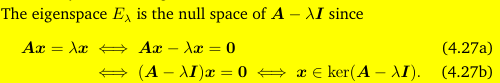
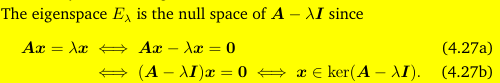

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,10]])

eig_val, eig_vec = np.linalg.eig(A)
λ = eig_val[0]
x = eig_vec[:,0]
I = np.eye(3)

print(A@x - λ*x)

![image.png](Images/img_1.png)
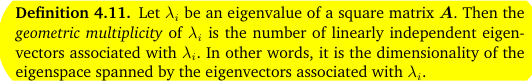

In [ ]:
A = np.array([
    [3,1,1],
    [1,3,1],
    [1,1,3]
])
I = np.eye(3)
n = A.shape[0]

eigvals = np.linalg.eigvals(A)
uniq = np.unique(np.round(eigvals, 10))  # group near-equal values

for λ in uniq:
    gm = n - rank(A - λ*I)
    print(f"lambda={λ}, geometric multiplicity={gm}")

![image.png](Images/img_7.png)
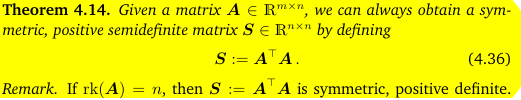

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

S = A.T @ A
print(S)

eigs = np.linalg.eigvalsh(S)

is_psd = np.all(eigs >= 0)
is_pd = np.all(eigs > 0) and rank(S) == 3
print(is_psd, is_pd)

![image.png](Images/img_8.png)
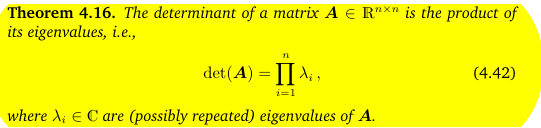

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

det_eq_prod_eigvals = np.allclose(det(A), np.prod(np.linalg.eigvals(A)))
print(det_eq_prod_eigvals)

![image.png](Images/img_9.png)
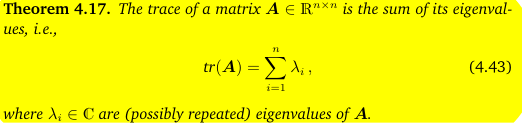

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

trace_eq_sum_eigvals = np.allclose(trace(A), np.sum(np.linalg.eigvals(A)))
print(trace_eq_sum_eigvals)

# Choleskey Decomposition
![image.png](Images/img_10.png)
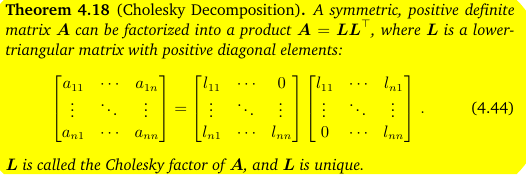

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])
S = A.T @ A
print(S)

cholesky = np.linalg.cholesky(S)
print(cholesky)
print(cholesky @ cholesky.T)

# Eigen Decomposition and Diagonalization
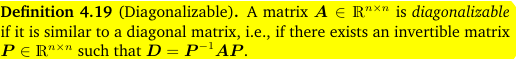

![image.png](Images/img_12.png)

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

w, P = np.linalg.eig(A)
# D = np.diag(w) # or
D = inv(P) @ A @ P
print(D)
print(P @ D @ inv(P))

![image.png](Images/img_11.png)
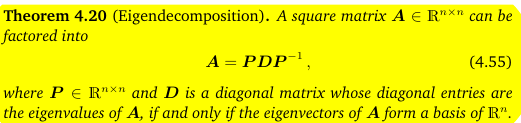

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

w, P = np.linalg.eig(A) # w = eigen values, P = corresponding eigen vectors as cols
# D = np.linalg.inv(P) @ A @ P # or
D = np.diag(w)
print(D, P, sep='\n')
print(np.allclose(A, P @ D @ inv(P)))

![image.png](Images/img_13.png)
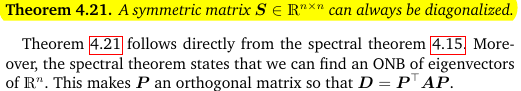

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])
S = A.T @ A

w, P = np.linalg.eig(S) # w = eigen values, P = corresponding eigen vectors as cols
# D = np.linalg.inv(P) @ S @ P # or
D = np.diag(w)

print(S)
print(D) # D = P.T @ S @ P
print(np.allclose(P.T, inv(P))) # P.T == P^-1

![image.png](Images/img_14.png)
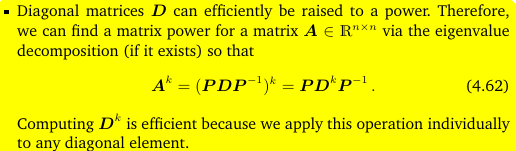

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

w, P = np.linalg.eig(A) # w = eigen values, P = corresponding eigen vectors as cols
# D = np.linalg.inv(P) @ A @ P # or
D = np.diag(w)

X = P @ D @ inv(P)
X3_eq_P_D3_inv_P = np.allclose(X @ X @ X, P @ D**3 @ inv(P))
print(X3_eq_P_D3_inv_P)

![image.png](Images/img_15.png)
![image.png](Images/img_16.png)
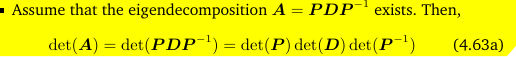
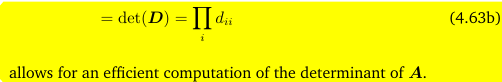

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

w, P = np.linalg.eig(A) # w = eigen values, P = corresponding eigen vectors as cols
D = np.diag(w)

det_A = det(A)
det_A1 = det(P @ D @ inv(P))
det_A2 = det(P) * det(D) * det(inv(P))
det_A3 = det(D)

compare = (np.allclose(det_A, det_A1) and
           np.allclose(det_A2, det_A3))
print(compare)

![image.png](Images/img_17.png)
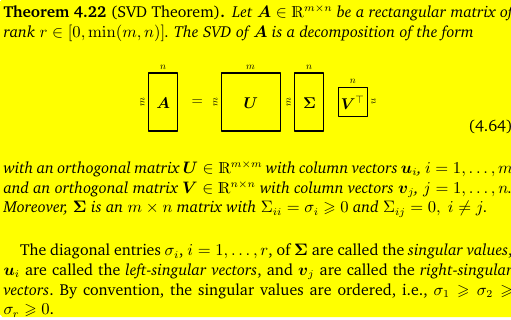

In [ ]:
A = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,10]
])

U,S,Vt = np.linalg.svd(A)
sigma = np.diag(S)

print(U, sigma, Vt, sep='\n')
print(np.allclose(A, U @ sigma @ Vt))